# Practical Session 1
## Biomedical Signal and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Hamza Mekhzoum, Jef Vandemeulebroucke<br>
<br>
Questions email or Teams: hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs: Yajing Wang - 0609591 & Wouter Apts - 0606557</font> </br>
<font color=blue>Academic Year </font>: 2023-2024

In all the practical sessions of this course we will use python 3 and jupyter notebooks. We will use google´s environment called 'colab'. https://colab.research.google.com .You will only need a gmail. Colab is equipped with most of the libraries
we will need in this semester. In case a module is not installed, you can install it with 'pip'.

# Purpose
The purpose of this exercise session is to obtain insight into the basic signal processing concepts; aliasing, Fourier transform and filtering commonly applied in medical signal and image analysis. For more information on these concepts, check the course slides and notes.

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two </b> students. In colab you should download the notebook in the format \*.ipynb and save it as a pdf version through print->save as pdf. <b>Both</b> the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The <b>deadline</b> for the first report is the <b>21st of November 2023 at 23:59</b>. Any report sent after the deadline will not be graded.

### Required modules

During this practical session, the following libraries will be used:
- numpy
- matplotlib
- scipy

To import any external library, you need to import it using the **import** statement followed by the name of the library.

### Exercise 1: Discrete Fourier Transform

Consider a sine wave signal with frequency f=5Hz and duration Tt=1s. Sample the signal with a sampling frequency fs=256Hz.

Generate the fourier transform, i.e. the spectral decomposition of the signal.

Spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum).

Report:
- Plot the sampled signal (use discrete points '*'). You can define the time axis with function https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
Be careful <b>not</b> to include the last point of the generated time axis

- Calculate the fourier transform of the discrete signal using functions https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html and plot the magnitude of its fourier transform with the help of function https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html


Do not forget to label the axes accordingly.

*Hint:*
Since we are going to compute a fourier transform in all the exercises of this WPO, it is better to define a function

e.g def create_fourier_transform(signal,fs):

        .......
        
        return frequencies,fourier_transform


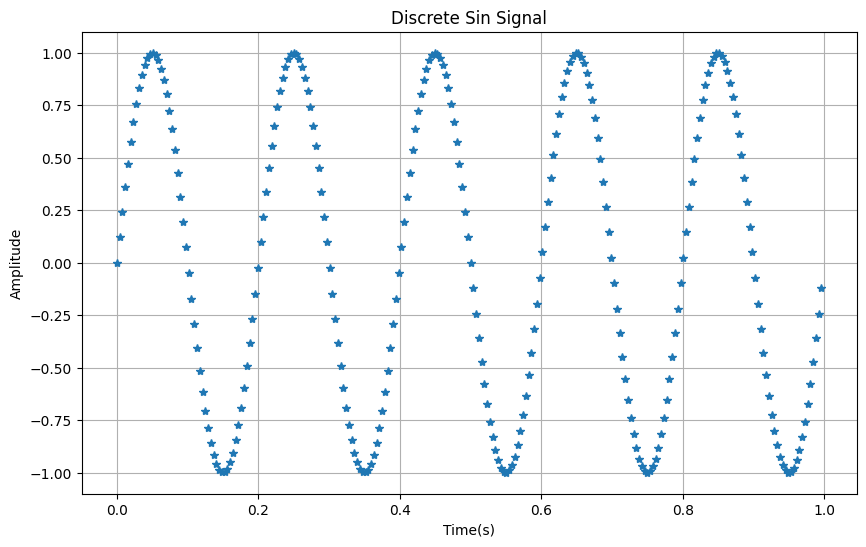

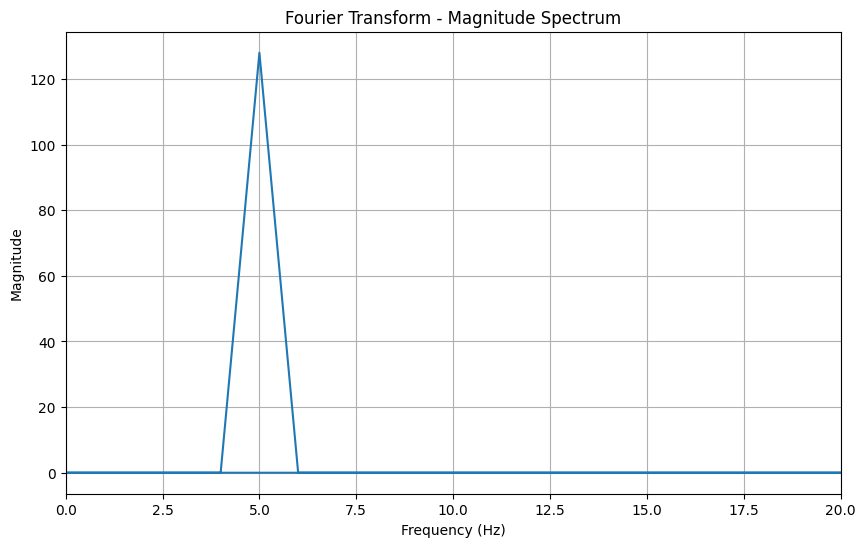

In [ ]:
#Your code here:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Define and create the sine wave
Fs = 256
Tt = 1
Freq = 5
samples_t = np.linspace(0, Tt, Fs*Tt, endpoint=False)
signal = np.sin(2 * np.pi * Freq * samples_t)


# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(samples_t, signal, '*')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Discrete Sin Signal')
plt.grid(True)
plt.show()


# Create the fourier transform
def create_fourier_transform(signal,fs):
  fourier_transform = np.fft.fft(signal)
  n = signal.size
  freq = np.fft.fftfreq(n, d=1/fs)
  return freq, fourier_transform


# Plot signals after fourier transformations
def plot_fft(freq, fourier_transform):
  plt.figure(figsize=(10, 6))
  plt.plot(freq, np.abs(fourier_transform))
  plt.title('Fourier Transform - Magnitude Spectrum')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.xlim([0, 20])
  plt.grid(True)
  plt.show()


freq, fourier_transform = create_fourier_transform(signal,Fs)
plot_fft(freq, fourier_transform)


From the spectrum analysis of the signal, where do you see the frequency?

<font color=blue>Because Fourier transform converts a signal from the time domain to the frequency domain, So we should obeserve the frequency components in a signal after it is transformed.
That's why the Graph peaks at frequency 5Hz. Since the wave signal was created using only a sine wave with frequency 5Hz, this was to be expected.</font>

### Exercise 2: Sampling
Generate a signal with a duration of 1s that consists of the sum of the following harmonics. Each harmonic is given by the equation $ amplitude sin(2 \pi t f) $

- 10 Hz with amplitude 0.3
- 30 Hz with amplitude 0.4
- 50 Hz with amplitude 0.5
- 80 Hz with amplitude 0.2 \
Step 1. Compute the Fourier transform when the frequency spectrum is sampled at 200Hz.\
Step 2 Change the sampling frequency to 100Hz and compute the Fourier transform again.\
Report:
- Plot the signal sampled at the two different sample frequencies( Use a continuous line and not discrete points)
- Plot the two Fourier transforms with the two different sampling frequencies.


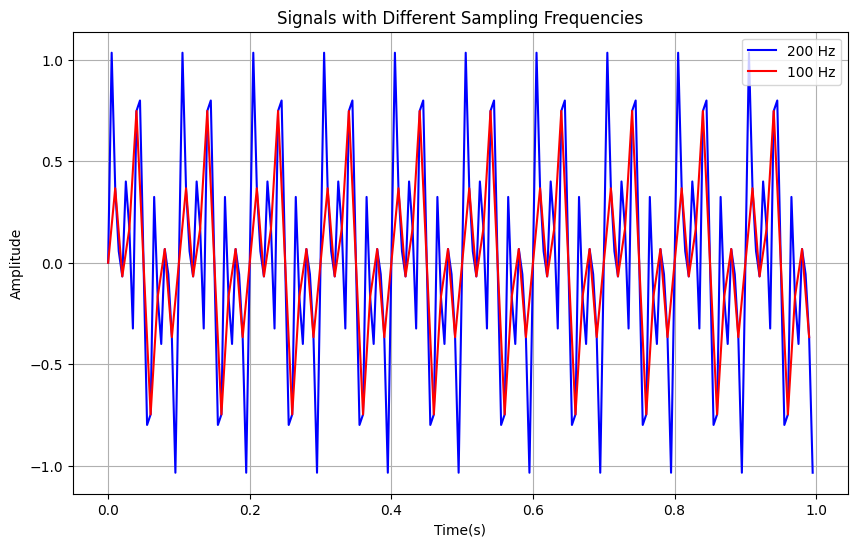

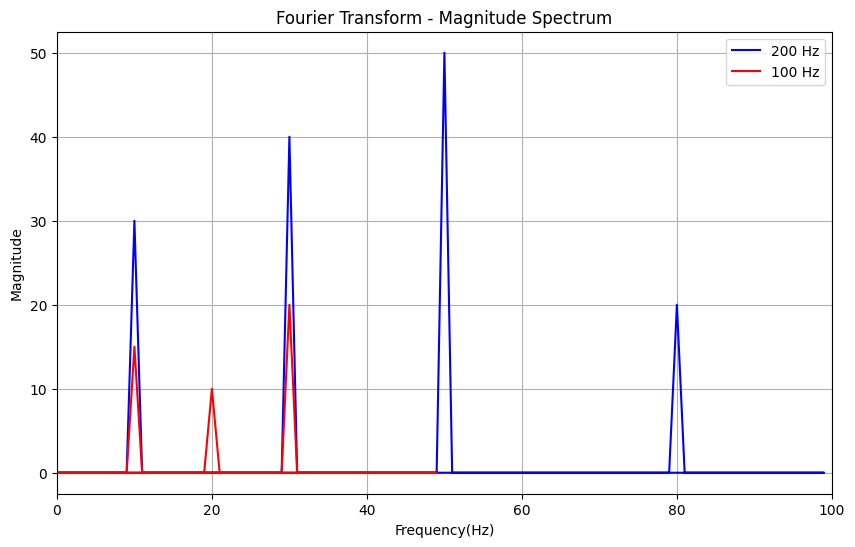

In [ ]:
#Your code here:

# Define the sine wave signal
def create_signal(Fs):
  Tt = 1
  samples_t = np.linspace(0, Tt, Tt*Fs, endpoint=False)
  signal1 = 0.3*np.sin(2 * np.pi * 10 * samples_t)
  signal2 = 0.4*np.sin(2 * np.pi * 30 * samples_t)
  signal3 = 0.5*np.sin(2 * np.pi * 50 * samples_t)
  signal4 = 0.2*np.sin(2 * np.pi * 80 * samples_t)
  signal = signal1+signal2+signal3+signal4
  return samples_t, signal

samples_t1 , signal_200hz = create_signal(200)
samples_t2, signal_100hz = create_signal(100)

# Plot signals
plt.figure(figsize=(10, 6))
plt.plot(samples_t1, signal_200hz, color='blue', label='200 Hz')
plt.plot(samples_t2, signal_100hz, color='red', label='100 Hz')
plt.title('Signals with Different Sampling Frequencies')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# Create fourier transformations
freq1, fourier_transform1 = create_fourier_transform(signal_200hz, 200)
freq2, fourier_transform2 = create_fourier_transform(signal_100hz, 100)

# Plot signals after fourier transformations
plt.figure(figsize=(10, 6))
plt.plot(freq1, np.abs(fourier_transform1), color='blue', label='200 Hz')
plt.plot(freq2, np.abs(fourier_transform2), color='red', label='100 Hz')
plt.title('Fourier Transform - Magnitude Spectrum')
plt.ylabel('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.xlim([0, 100])
plt.legend()
plt.grid(True)
plt.show()







Describe what do you observe in the generated spectrums and why.

<font color=blue>The Fourier transform with the higher sample frequency (200Hz) manages to correctly capture the composition of the created wave by displaying all sine waves used. (4 harmonics with different frequency: 10Hz, 30Hz, 50Hz, 80Hz).

<font color=blue>The lower sample frequency (100Hz) results in a loss of information concerning the higher frequency sine waves. This can be explained using the Nyquest theorem that states that to correctly measure a wave of frequency F, a sampling rate of at least twice the highest frequency component that should be used.</font>

Therefore, if the sampling frequency is lower than the Nyquist frequency, aliasing will occur, which is high-frequency signals are incorrectly interpreted as low-frequency signals, so that 20Hz rather than 30Hz was showed in the second graph.</font>

### Exercise 3: Filtering
Design a filter that filters the signal of the second exercise so that only frequencies 30 and 50 pass. Consider sampling frequency of 200Hz.
- Design a digital butterworth bandpass filter of 10th order using the signal.butter function from the scipy module.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html Change the definitions appropriately! Get the output as output='ba'. You will need the values of a,b in the following step
- Plot the frequency response of the <b>digital</b> filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
- Filter the signal with the designed filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
- Plot the fourier transform of the filtered signal

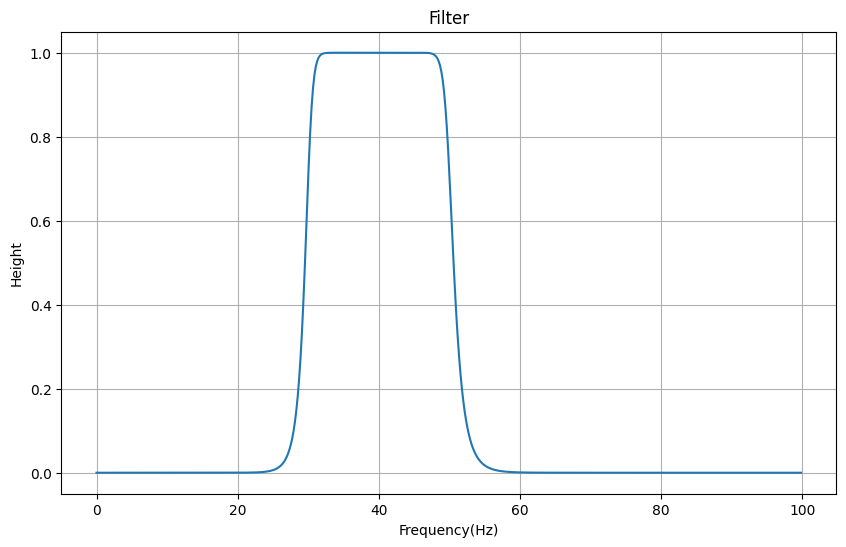

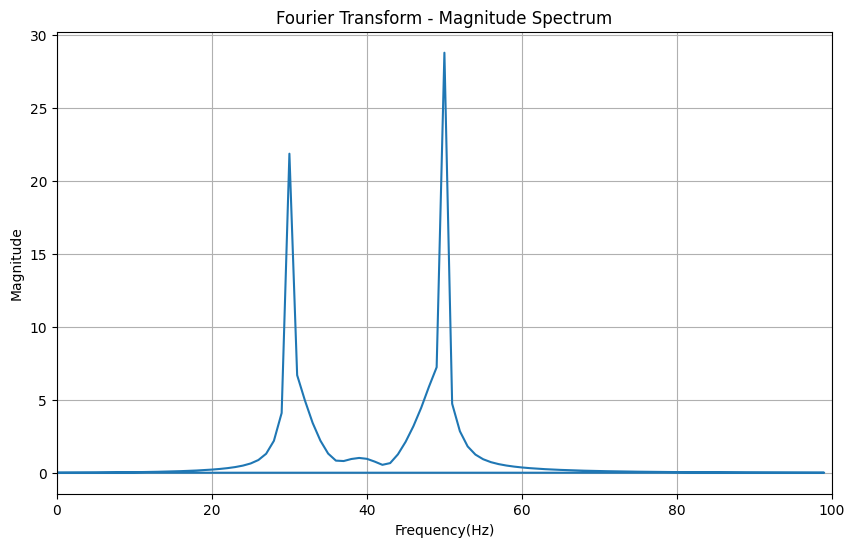

In [ ]:
#Your code here:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import numpy as np

def butterworth(order, low, high):
  b,a = butter(order, [low, high], analog=False, btype='bandpass', output='ba', fs=200)
  return b, a

b,a = butterworth(10, 30, 50)
w, h = freqz(b, a)

# Plot the frequency response of the digital filter
plt.figure(figsize=(10, 6))
# Convert w which is normalized frequencies to actual physical frequencies
plt.plot(0.5 * 200 * w / np.pi, np.abs(h))
plt.title("Filter")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Height")
plt.grid(True)
plt.show()


signal_200hz_filtered = lfilter(b,a,signal_200hz)
freq, fourier_transform = create_fourier_transform(signal_200hz_filtered ,200)

# Plot the filtered signal after fourier transformation
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fourier_transform))
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude")
plt.title('Fourier Transform - Magnitude Spectrum')
plt.grid(True)
plt.xlim([0,100])
plt.show()

What do you observe in the spectrum of the filtered signal?</br>
<font color=blue>We can observe two significant peaks at 30Hz and 50Hz, because this 2 frequencies are allowed to pass the filter and frequencies 10Hz and 80Hz get correctly filtered out.

Even though the Magnitude of range between 30 and 50Hz is also larger than 0, but it does not mean some unwanted random signals also can pass, this is just a normal characteristic of the filter.</font>